In [20]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.models import model_from_json, Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm


In [21]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [22]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [23]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [24]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [25]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [26]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [27]:
from tqdm.notebook import tqdm

In [28]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [29]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\ACER\python\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [30]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [31]:
x_train = train_features/255.0
x_test = test_features/255.0

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [34]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [35]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [36]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\ACER\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data  = (x_test,y_test))

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.2415 - loss: 1.8321 - val_accuracy: 0.2615 - val_loss: 1.8177
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.2524 - loss: 1.8048 - val_accuracy: 0.2644 - val_loss: 1.7671
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.2830 - loss: 1.7377 - val_accuracy: 0.3559 - val_loss: 1.6034
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.3667 - loss: 1.6092 - val_accuracy: 0.4434 - val_loss: 1.4531
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.4091 - loss: 1.5077 - val_accuracy: 0.4757 - val_loss: 1.3493
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.4457 - loss: 1.4369 - val_accuracy: 0.5044 - val_loss: 1.2999
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 222s 981ms/step - accuracy: 0.4730 - loss: 1.3680 - val_accuracy: 0.5157 - val_loss: 1.2645
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.4807 - loss: 1.3518 - val_a

In [40]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [41]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [49]:
image = 'images/train/angry/0.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is  angry


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is  sad


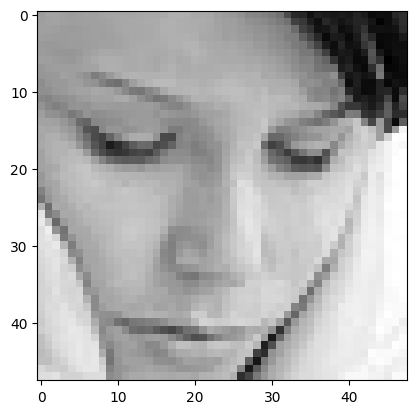

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
model prediction is  disgust


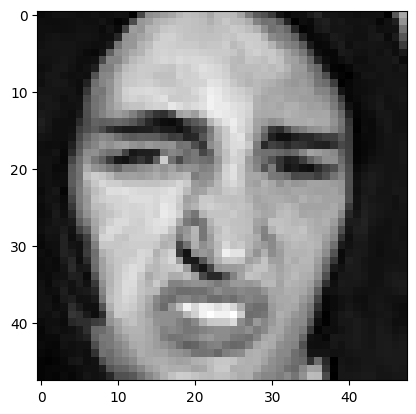

In [78]:

image = 'images/train/disgust/2419.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
model prediction is  fear


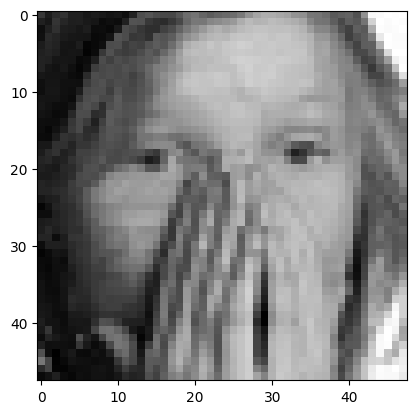

In [69]:
image = 'images/train/fear/45.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
model prediction is  happy


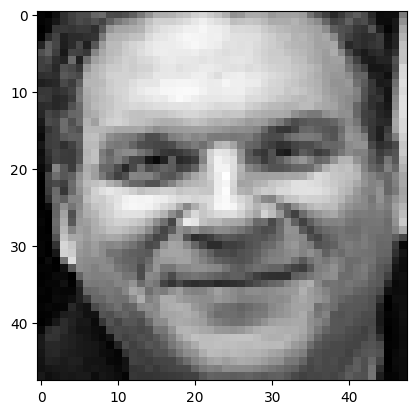

In [70]:
image = 'images/train/happy/14.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
model prediction is  sad


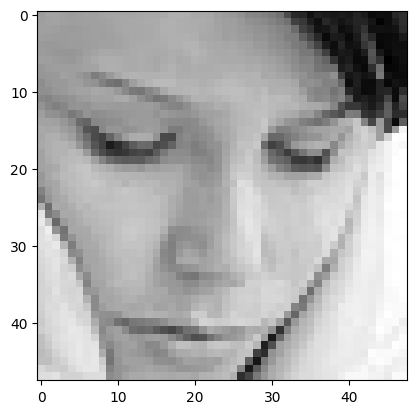

In [68]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
model prediction is  surprise


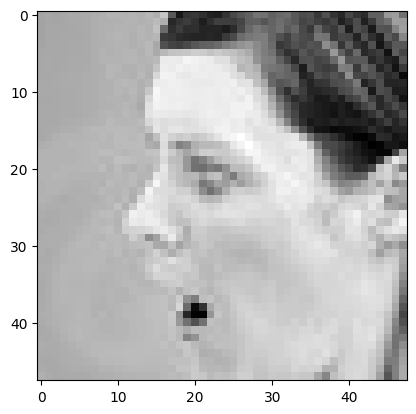

In [76]:

image = 'images/train/surprise/128.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')